# Constructing a network of Wikipedia pages

We start from a seed wikipedia page "Complex Network"

In [11]:
from operator import itemgetter
import networkx as nx
import wikipedia

In [12]:
SEED = "Complex network".title()

In [13]:
print(SEED)

Complex Network


In [14]:
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier", "Pubmed Central",
         "Digital Object Identifier", "Arxiv",
         "Proc Natl Acad Sci Usa", "Bibcode",
         "Library Of Congress Control Number", "Jstor")

In [15]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED)   # The SEED itself
done_set = set()       # Nothing is done yet

In [16]:
F = nx.DiGraph()
layer, page = todo_lst[0]

In [17]:
while layer < 2:
    del todo_lst[0] # Remove the name page of the current page from the todo_lst, 
                    # and add it to the set of processed pages. If the script encounters this page again, 
                    # it will skip over it.
    print(layer, page) # Show progress

    try: # Attempt to download the selected page. If the attempt is unsuccessful (things happen!), 
         # proceed to the next page from the “to-do” list.
        wiki = wikipedia.page(page)
    except:
        layer, page = todo_lst[0]
        print("Could not load", page)
        continue

    for link in wiki.links: # Evaluate each link. If the subject is not blacklisted and not a list itself, 
                            # the script adds an edge to the graph between the current node and the linked page. 
                            # If the script did not process the linked page before and it is not on the “to-do” list, 
                            # add it to the list and corresponding set. Note that the highlighted code line is 
                            # involved in the network construction—the only line in the script!
        link = link.title()
        if link not in STOPS and not link.startswith("List Of"):
            if link not in todo_set and link not in done_set:
                todo_lst.append((layer + 1, link))
                todo_set.add(link)
            F.add_edge(page, link)

    layer, page = todo_lst[0] # Take the next page name from the “to-do” list. 
                              # Hopefully, the list is not empty. If it is—congratulations, 
                              # you just downloaded the complete Wikipedia!
print("{} nodes, {} edges".format(len(F), nx.number_of_edges(F)))

0 Complex Network
1 Adjacency List
1 Adjacency Matrix
1 Agent-Based Model
1 Albert-László Barabási
1 Artificial Neural Network
1 Assortativity
1 Autonomous System (Internet)
1 Balance Theory
1 Barabási–Albert Model
1 Betweenness Centrality
1 Biological Network
1 Biology
1 Bipartite Graph
1 Boolean Network
1 Branching Process
1 Centrality
1 Climate
1 Clique (Graph Theory)
1 Closeness (Graph Theory)


/Users/claudio/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/claudio/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Could not load Clustering Coefficient
1 Clustering Coefficient
1 Combinatorial Optimization
1 Community Structure
1 Complete Graph
1 Complex Adaptive System
1 Complex Contagion
1 Complex Systems
1 Computer Network
1 Computer Science
1 Connected Component (Graph Theory)
1 Cut (Graph Theory)
1 Cycle (Graph Theory)
1 Degree (Graph Theory)
1 Degree Distribution
1 Dependency Network
1 Directed Graph
1 Distance (Graph Theory)
1 Dual-Phase Evolution
1 Duncan J. Watts
1 Dynamic Network Analysis
1 Edge (Graph Theory)
Could not load Efficiency (Network Science)
1 Efficiency (Network Science)


KeyboardInterrupt: 

## Eliminate duplicates

Accurately merging all duplicate nodes involves natural language processing (NLP) tools that are outside of the scope of this notebook. It may suffice to join only those nodes that differ by the presence/absence of the letter _s_ at the end or a hyphen in the middle.

Start removing self-loops (pages referring to themselves). The loops don’t change the network properties but affect the correctness of duplicate node elimination.

Now, you need a list of at least _some_ duplicate nodes. You can build it by looking at each node in **F** and checking if a node with the same name, but with an s at the end, is also in **F**. Pass each pair of duplicated node names to the function **nx.contracted_nodes(F,u,v)** that merges node **v** into node **u** in the graph **F**. The function reassigns all edges previously incident to **v**, to **u**. If you don’t pass the option **self_loops=False**, the function converts an edge from **v** to **u** (if any) to a self-loop.

In [18]:
F.remove_edges_from(F.selfloop_edges())
duplicates = [(node, node + "s") for node in F if node + "s" in F]
for dup in duplicates:
    F = nx.contracted_nodes(F, *dup, self_loops=False)
duplicates = [(x, y) for x, y 
              in [(node, node.replace("-", " ")) for node in F]
              if x != y and y in F]
for dup in duplicates:
    F = nx.contracted_nodes(F, *dup, self_loops=False)

In [19]:
print(F.nodes(data=True))

[('Complex Network', {'contraction': {'Complex Networks': {}}}), ('Adjacency List', {}), ('Adjacency Matrix', {}), ('Agent-Based Model', {}), ('Albert-László Barabási', {}), ('Artificial Neural Network', {'contraction': {'Artificial Neural Networks': {}}}), ('Assortativity', {}), ('Autonomous System (Internet)', {}), ('Balance Theory', {}), ('Barabási–Albert Model', {}), ('Betweenness Centrality', {}), ('Biological Network', {}), ('Biology', {}), ('Bipartite Graph', {}), ('Boolean Network', {}), ('Branching Process', {}), ('Centrality', {}), ('Climate', {}), ('Clique (Graph Theory)', {}), ('Closeness (Graph Theory)', {}), ('Clustering Coefficient', {}), ('Combinatorial Optimization', {}), ('Community Structure', {}), ('Complete Graph', {}), ('Complex Adaptive System', {}), ('Complex Contagion', {}), ('Computer Network', {}), ('Computer Science', {}), ('Connected Component (Graph Theory)', {}), ('Cut (Graph Theory)', {}), ('Cycle (Graph Theory)', {}), ('Degree (Graph Theory)', {}), ('De

The value of the attribute is a dictionary, but GraphML does not support dictionary attributes. 
Below we set the contraction property to 0 for all nodes to avoid further troubles with exporting 
the graph.

In [20]:
nx.set_node_attributes(F, 0, "contraction") 

for n in F.nodes(data=True):
    print(n)

('Complex Network', {'contraction': 0})
('Adjacency List', {'contraction': 0})
('Adjacency Matrix', {'contraction': 0})
('Agent-Based Model', {'contraction': 0})
('Albert-László Barabási', {'contraction': 0})
('Artificial Neural Network', {'contraction': 0})
('Assortativity', {'contraction': 0})
('Autonomous System (Internet)', {'contraction': 0})
('Balance Theory', {'contraction': 0})
('Barabási–Albert Model', {'contraction': 0})
('Betweenness Centrality', {'contraction': 0})
('Biological Network', {'contraction': 0})
('Biology', {'contraction': 0})
('Bipartite Graph', {'contraction': 0})
('Boolean Network', {'contraction': 0})
('Branching Process', {'contraction': 0})
('Centrality', {'contraction': 0})
('Climate', {'contraction': 0})
('Clique (Graph Theory)', {'contraction': 0})
('Closeness (Graph Theory)', {'contraction': 0})
('Clustering Coefficient', {'contraction': 0})
('Combinatorial Optimization', {'contraction': 0})
('Community Structure', {'contraction': 0})
('Complete Graph'

('Alpine Climate', {'contraction': 0})
('Altitude', {'contraction': 0})
('American Meteorological Society', {'contraction': 0})
('American Scientist', {'contraction': 0})
('Ancient Greek', {'contraction': 0})
('Anemometer', {'contraction': 0})
('Anoxic Event', {'contraction': 0})
('Antarctic Circumpolar Wave', {'contraction': 0})
('Antarctic Oscillation', {'contraction': 0})
('Anticyclone', {'contraction': 0})
('Arctic', {'contraction': 0})
('Arctic Dipole Anomaly', {'contraction': 0})
('Arctic Haze', {'contraction': 0})
('Arctic Methane Release', {'contraction': 0})
('Arctic Oscillation', {'contraction': 0})
('Arcus Cloud', {'contraction': 0})
('Arid Climate', {'contraction': 0})
('Atlantic Equatorial Mode', {'contraction': 0})
('Atlantic Hurricane', {'contraction': 0})
('Atlantic Ocean', {'contraction': 0})
('Atlantic Multidecadal Oscillation', {'contraction': 0})
('Atmosphere', {'contraction': 0})
('Atmospheric Chemistry', {'contraction': 0})
('Atmospheric Convection', {'contraction

('Glossary Of Chemistry Terms', {'contraction': 0})
('Glossary Of Civil Engineering', {'contraction': 0})
('Glossary Of Clinical Research', {'contraction': 0})
('Glossary Of Computer Science', {'contraction': 0})
('Glossary Of Economics', {'contraction': 0})
('Glossary Of Electrical And Electronics Engineering', {'contraction': 0})
('Glossary Of Engineering', {'contraction': 0})
('Glossary Of Entomology Terms', {'contraction': 0})
('Glossary Of Environmental Science', {'contraction': 0})
('Glossary Of Genetics', {'contraction': 0})
('Glossary Of Geography', {'contraction': 0})
('Glossary Of Geography Terms', {'contraction': 0})
('Glossary Of Geology', {'contraction': 0})
('Glossary Of Machine Vision', {'contraction': 0})
('Glossary Of Mechanical Engineering', {'contraction': 0})
('Glossary Of Medicine', {'contraction': 0})
('Glossary Of Meteoritics', {'contraction': 0})
('Glossary Of Physics', {'contraction': 0})
('Glossary Of Probability And Statistics', {'contraction': 0})
('Glossary

In [21]:
nx.write_graphml(F,"cna.graphml")

In [22]:
core = [node for node, deg in F.degree() if deg >= 2]
G = nx.subgraph(F, core)
print("{} nodes, {} edges".format(len(G), nx.number_of_edges(G)))
nx.write_graphml(G,"cna2.graphml") # We also save a a subgraph of F wi

993 nodes, 2795 edges


In [23]:
top_indegree = sorted(G.in_degree(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

24 Graph (Discrete Mathematics)
19 Graph Theory
19 Vertex (Graph Theory)
16 Social Network
15 Directed Graph
13 Degree (Graph Theory)
13 Network Theory
12 Bipartite Graph
11 Network Science
11 Mathematics
11 Edge (Graph Theory)
10 Incidence Matrix
10 Small-World Network
10 Path (Graph Theory)
10 Centrality
10 Graph (Abstract Data Type)
10 Scale-Free Network
10 Complete Graph
10 Random Graph
9 Cycle (Graph Theory)
9 Percolation Theory
9 Adjacency Matrix
9 Graph Drawing
9 Connected Component (Graph Theory)
9 Clique (Graph Theory)
9 Flow Network
9 Distance (Graph Theory)
8 Weighted Network
8 Social Capital
8 Wayback Machine
8 Betweenness Centrality
8 Loop (Graph Theory)
8 Social Network Analysis Software
8 Multigraph
8 Preferential Attachment
8 Complex Network
8 Degree Distribution
7 Adjacency List
7 Transitive Relation
7 Social Network Analysis
7 Interdependent Networks
7 Telecommunications Network
7 Algorithm
7 Watts And Strogatz Model
7 Connectivity (Graph Theory)
7 Cut (Graph Theory)


## Plotting degree distribution

plotting with linear scales the frequency of nodes that show a given degree

/Users/claudio/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


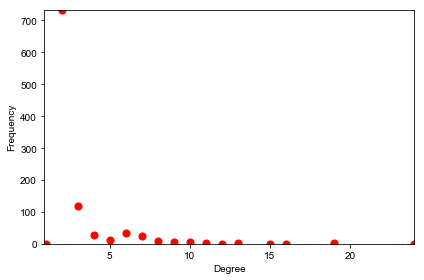

In [26]:
import collections 
import matplotlib.pyplot as plt
import dzcnapy_plotlib as dzcnapy

inlinks_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(inlinks_sequence)
x, y = zip(*degreeCount.items())

plt.scatter(x, y, s=50, c="red")

plt.xlim(0.9, max(x))
plt.ylim(0.9, max(y))
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Frequency")
dzcnapy.plot("Degree distribution of a 'complex network' ego-graph")

It is pretty clear that the normal distribution hypothesis is not validated. Plotting the degree distribution in a log-log scale gives a signal of skewed distribution (with larger nodes population that will be likely approximated by a power law)

/Users/claudio/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


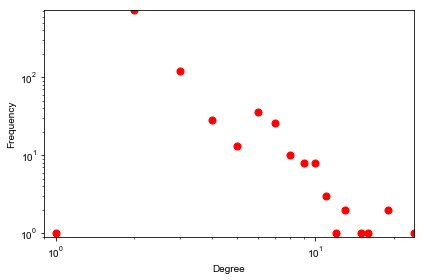

In [28]:
plt.scatter(x, y, s=50, c="red")

plt.xlim(0.9, max(x))
plt.ylim(0.9, max(y))
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Frequency")
dzcnapy.plot("Degree distribution of a 'complex network' ego-graph")